In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

In [123]:
wp_MERRA2 = xr.open_dataset('/data/users/kgruber/results/USA/windpower_stat_MERRA2.nc')

In [138]:
ccor_MERRA2 = np.corrcoef(np.transpose(wp_MERRA2.wp.values))

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


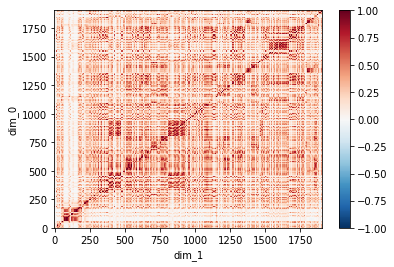

In [139]:
xr.DataArray(ccor_MERRA2).plot()

In [222]:
np.corrcoef(wp_MERRA2.isel(location=0).wp,wp_MERRA2.isel(location=1).wp)

array([[1.        , 0.08897106],
       [0.08897106, 1.        ]])

In [223]:
np.corrcoef(wp_MERRA2.isel(location=0).wp[wp_MERRA2.isel(location=0).wp>0],wp_MERRA2.isel(location=1).wp[wp_MERRA2.isel(location=0).wp>0])

array([[1.        , 0.25844398],
       [0.25844398, 1.        ]])

In [140]:
np.isnan(ccor_MERRA2).sum()/ccor_MERRA2.size

0.01567783406682823

In [141]:
ccor_MERRA2[np.isnan(ccor_MERRA2)] = 3

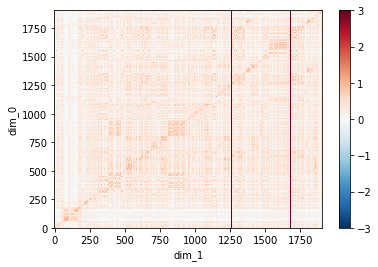

In [241]:
xr.DataArray(ccor_MERRA2).plot()

In [149]:
len(np.where(ccor_MERRA2==3)[0])/len(np.unique(np.where(ccor_MERRA2==3)[0]))

29.881951731374606

In [150]:
np.unique(np.where(ccor_MERRA2==3)[1])

array([   0,    1,    2, ..., 1903, 1904, 1905])

(array([2865., 4741., 6647., 4741., 4756., 4741., 6647., 8523., 8538.,
        4756.]),
 array([   0. ,  190.5,  381. ,  571.5,  762. ,  952.5, 1143. , 1333.5,
        1524. , 1714.5, 1905. ]),
 <a list of 10 Patch objects>)

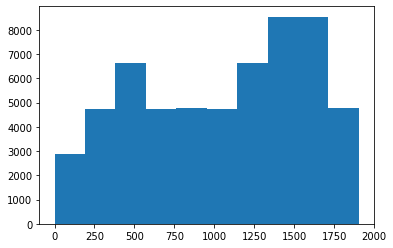

In [156]:
plt.hist(np.where(ccor_MERRA2==3)[1])

(array([2865., 4741., 6647., 4741., 4756., 4741., 6647., 8523., 8538.,
        4756.]),
 array([   0. ,  190.5,  381. ,  571.5,  762. ,  952.5, 1143. , 1333.5,
        1524. , 1714.5, 1905. ]),
 <a list of 10 Patch objects>)

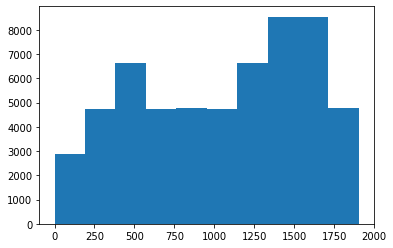

In [157]:
plt.hist(np.where(ccor_MERRA2==3)[0])

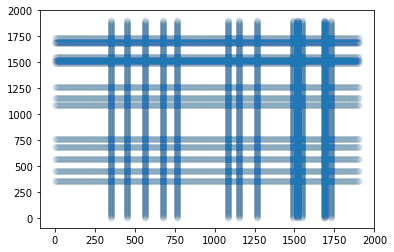

In [174]:
plt.scatter(np.where(ccor_MERRA2==3)[0],np.where(ccor_MERRA2==3)[1],alpha=0.01)

In [176]:
np.where(ccor_MERRA2==3)[0][np.where(ccor_MERRA2==3)[0]==np.where(ccor_MERRA2==3)[1]]

array([ 353,  455,  564,  680,  764, 1084, 1151, 1263, 1494, 1516, 1522,
       1546, 1683, 1692, 1731])

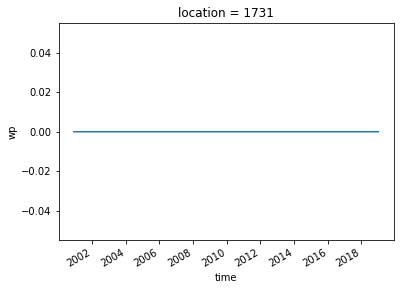

In [198]:
wp_MERRA2.isel(location=1731).wp.plot()

In [224]:
wp_ERA5 = xr.open_dataset('/data/users/kgruber/results/USA/windpower_stat_ERA5.nc')

In [225]:
ccor_ERA5 = np.corrcoef(np.transpose(wp_ERA5.wp.values))

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


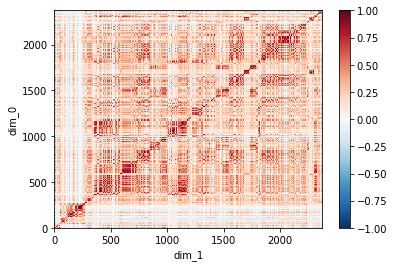

In [226]:
xr.DataArray(ccor_ERA5).plot()

In [236]:
np.where(np.isnan(ccor_ERA5))[0][np.where(np.isnan(ccor_ERA5))[0]==np.where(np.isnan(ccor_ERA5))[1]]


array([ 396,  540,  564,  565,  624,  751,  997, 1332, 1406, 1682, 1884,
       1931, 1934, 1972, 2135, 2167, 2170, 2187, 2205])

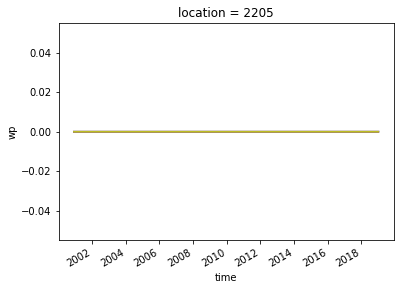

In [237]:
for n in [ 396,  540,  564,  565,  624,  751,  997, 1332, 1406, 1682, 1884,
       1931, 1934, 1972, 2135, 2167, 2170, 2187, 2205]:
    wp_ERA5.isel(location=n).wp.plot()

In [4]:
wp_MERRA2_GWA = xr.open_mfdataset('/data/users/kgruber/results/USA/windpower_??_MERRA2_GWA.nc')

In [7]:
51328/2

25664.0

In [11]:
8*51327**2/10**6

21075.687432

In [5]:
a = wp_MERRA2_GWA.isel(location=slice(25664)).wp
b = wp_MERRA2_GWA.isel(location=slice(25663,len(wp_MERRA2_GWA.location))).wp

In [15]:
a = wp_MERRA2_GWA.isel(location=slice(10)).wp
b = wp_MERRA2_GWA.isel(location=slice(10,20)).wp

In [16]:
ccor_MERRA2_GWA = np.corrcoef(a,b,rowvar=False)

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [17]:
ccor_MERRA2_GWA.shape

(20, 20)

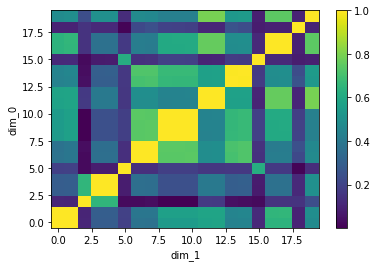

In [18]:
xr.DataArray(ccor_MERRA2_GWA).plot()

[########################################] | 100% Completed |  0.1s


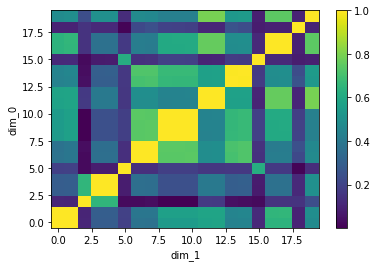

In [19]:
xr.DataArray(np.corrcoef(wp_MERRA2_GWA.isel(location=slice(20)).wp,rowvar=False)).plot()

In [ ]:
np.corrcoef(wp_MERRA2_GWA)

In [24]:
ccor_MERRA2_GWA = np.corrcoef(wp_MERRA2_GWA.isel(location=slice(10000)).wp,rowvar=False)

[########################################] | 100% Completed | 34.9s


/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


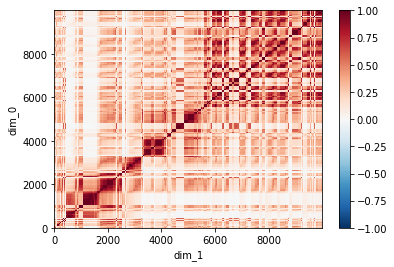

In [25]:
xr.DataArray(ccor_MERRA2_GWA).plot()

In [8]:
len(wp_MERRA2_GWA.location)**2

2634460929

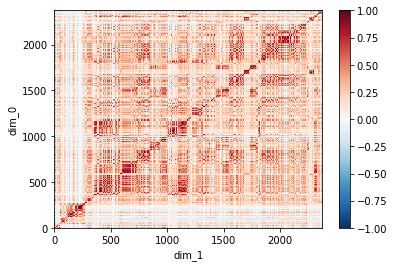

In [226]:
xr.DataArray(ccor_MERRA2_GWA).plot()